# Time Series Analysis

## Project Overview

This project presents a comprehensive analysis of a hypothetical brand's sales performance operated in the FMCG in relation to its marketing strategies and the corresponding competitive landscape. 

Purpose of the Analysis:

The primary objective of this analysis is to evaluate the effectiveness of the brand's marketing initiatives and their interplay with competitor strategies. By scrutinizing sales, advertising, and pricing data, this report aims to empower the brand's management with actionable insights for data-driven decision-making. The analysis can be broken into:

1) Analysis on the brand's marketing effectiveness
2) Analysis on the brand's marketing interaction with competitors
3) Analysis on the relative impact of the brand own and competitors' marketing action on sales.

## Outline

Part 1: Import dataset and necessary libraries

Part 2: Data preprocessing - data wrangling & cleaning

Part 3: Exploratory data analysis (EDA)

- Descriptive Analysis
- Temporal Causality Analysis
- Stationarity Analysis
- Dynamic System Analysis
- Variance Decomposition Analysis

Part 4: Conclusion: manegerial insights & recommendations

## Data Descriptions

The dataset contains 207 weekly observations of the brand's performance metrics including log-transformed sales, advertising expenditure, and pricing data, and competitors' actions including competitors' price and advertising. 

1) Week - Identifier for the week of observation; 1-207 (linear trend)

2) LnSales - Log-transformed volume sales of the brand (expressed in the relevant unit)

3) LnAdvertising - Log-transformed advertising spending by the brand (in dollars) 

4) LnPrice - Log-transformed unit price of the brand (expressed in dollars per unit)

5) LnTotalCompAdvertising - Log-transformed total advertising spending by competitors of the brand (expressed in dollars)

6) LnAvgCompPrice - Log-transformed average unit price of competitors of the brand (expressed in dollars per unit)

7) Qrtr 1 - Indicator variable = 1 for the first quarter, 0 otherwise

8) Qrtr 2 - Indicator variable = 1 for the second quarter, 0 otherwise

9) Qrtr 3 - Indicator variable = 1 for the third quarter, 0 otherwise

10) Qrtr 4 - Indicator variable = 1 for the fourth quarter, 0 otherwise

## Part 1: Import Dataset & Libraries

In [27]:
# Install necessary libraries

install.packages("corrplot")
library(corrplot)

install.packages("stargazer")
library(stargazer)

library(lmtest)
library(vars)

library(ggplot2)

options(warn= -1)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# Import Data

brand_df <- read.csv('timeseries_data.csv') 
brand_df <- data.frame(brand_df)

str(brand_df)

'data.frame':	207 obs. of  10 variables:
 $ Week                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LnSales               : num  13.4 13.3 13.4 13.4 13.3 ...
 $ LnAdvertising         : num  13.38 12.33 13.75 9.88 13.54 ...
 $ LnPrice               : num  -5.39 -5.28 -5.25 -5.38 -5.26 ...
 $ LnTotalCompAdvertising: num  11.4 11.2 12.7 12.9 13 ...
 $ LnAvgCompPrice        : num  -5.6 -5.42 -5.32 -5.44 -5.34 ...
 $ Qrtr1                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Qrtr2                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Qrtr3                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Qrtr4                 : int  0 0 0 0 0 0 0 0 0 0 ...


In [6]:
summary(brand_df)

      Week          LnSales      LnAdvertising      LnPrice      
 Min.   :  1.0   Min.   :12.72   Min.   : 0.00   Min.   :-5.554  
 1st Qu.: 52.5   1st Qu.:13.22   1st Qu.:12.96   1st Qu.:-5.344  
 Median :104.0   Median :13.33   Median :13.63   Median :-5.281  
 Mean   :104.0   Mean   :13.33   Mean   :12.56   Mean   :-5.286  
 3rd Qu.:155.5   3rd Qu.:13.46   3rd Qu.:14.13   3rd Qu.:-5.225  
 Max.   :207.0   Max.   :13.79   Max.   :15.08   Max.   :-5.030  
 LnTotalCompAdvertising LnAvgCompPrice       Qrtr1            Qrtr2       
 Min.   : 0.00          Min.   :-5.599   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:11.94          1st Qu.:-5.183   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :12.46          Median :-5.066   Median :0.0000   Median :0.0000  
 Mean   :12.10          Mean   :-5.083   Mean   :0.2464   Mean   :0.2512  
 3rd Qu.:12.78          3rd Qu.:-5.013   3rd Qu.:0.0000   3rd Qu.:0.5000  
 Max.   :14.77          Max.   :-4.706   Max.   :1.0000   Max.   :1.0000  
     Qrtr3   

## Part 2: Data Preprocessing - Data Wrangling & Cleaning

Pre-processing involved verifying data integrity, handling anomalies, handling missing values, and ensuring appropriate data transformation for time series analysis.


In [8]:
# Explore missing(NAs) - No missing in dataset

sum(is.na(brand_df))

[1] 0

In [25]:
# Check data format - data is in the right format

for (colname in names(brand_df)) {
    datatype <- class(brand_df[[colname]])
    print(paste(colname, ':', datatype))
}


[1] "Week : integer"
[1] "LnSales : numeric"
[1] "LnAdvertising : numeric"
[1] "LnPrice : numeric"
[1] "LnTotalCompAdvertising : numeric"
[1] "LnAvgCompPrice : numeric"
[1] "Qrtr1 : integer"
[1] "Qrtr2 : integer"
[1] "Qrtr3 : integer"
[1] "Qrtr4 : integer"


## Part 3: Exploratory Data Analysis (EDA)

## 3.1 Visualization: Time series plot for each variables & Correlation Matrix

### Key Findings

Our comprehensive time-series analysis reveals a competitive market where the brand's pricing strategies and competitors' moves intricately interplay. Here are the key findings with implications for strategic decisions:

- Sales and Pricing Trends: 

The brand's sales trajectory shows sensitivity to pricing fluctuations. Our data exhibit a clear pattern where RedStar's sales inversely correlate with its own price adjustments but interestingly improve with competitors' price hikes. This suggests a market perception of RedStar as a value proposition relative to competitors.

- Advertising Influence: 

A hiatus in RedStar's advertising efforts was observed, creating windows where competitors potentially capitalized on market attention. RedStar's advertising efforts have been found to impact competitors' strategies, suggesting an active market response to RedStar's marketing campaigns.

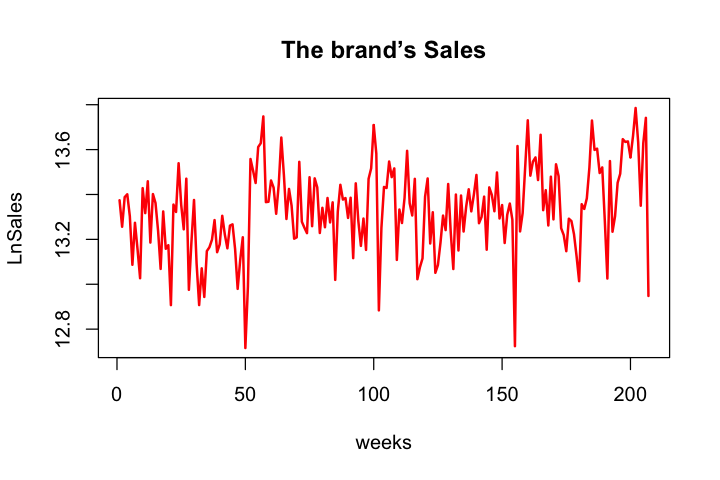

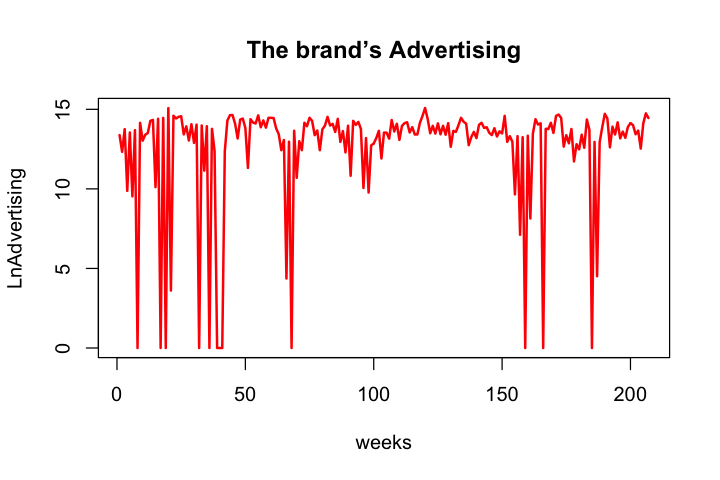

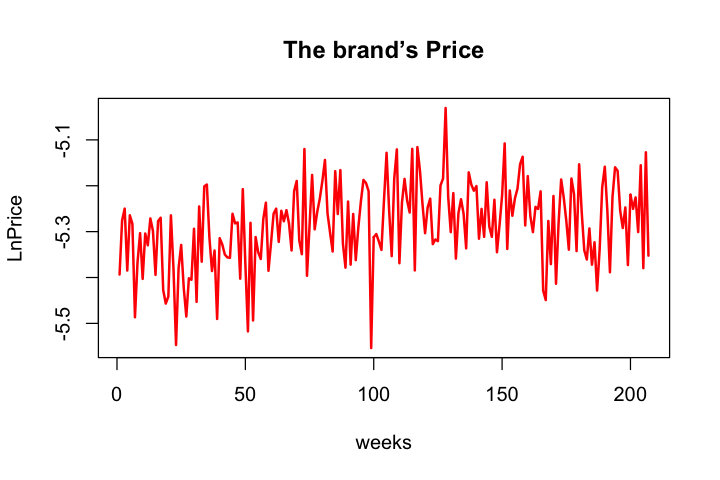

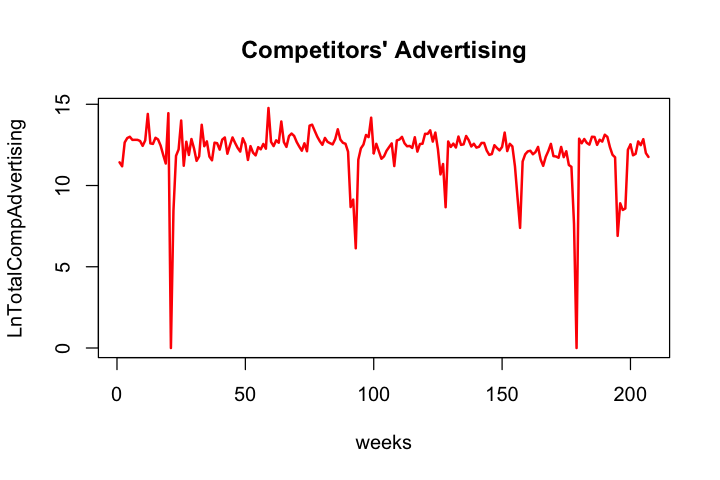

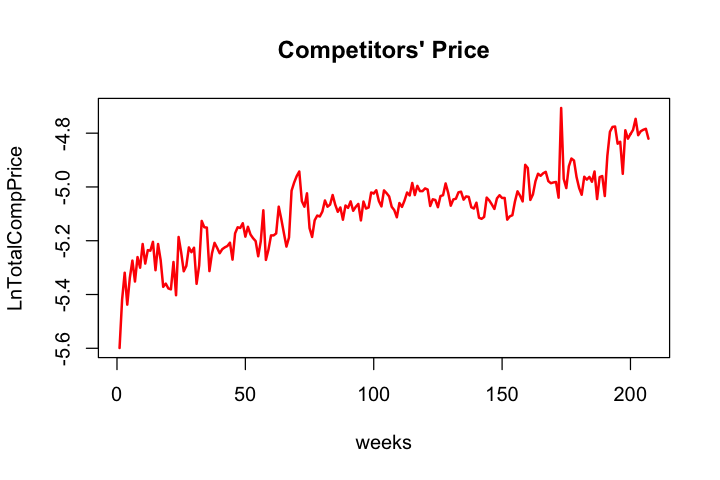

In [30]:
options(repr.plot.width=6, repr.plot.height=4)

# Plot Own 'Sales'
plot(brand_df[,c(1)],brand_df[,c(2)], type="l", col="red", lwd=2, xlab="weeks", ylab="LnSales", main="The brand’s Sales") 

# Plot Own 'Advertising'
plot(brand_df[,c(1)],brand_df[,c(3)], type="l", col="red", lwd=2, xlab="weeks", ylab="LnAdvertising", main="The brand’s Advertising") 

# Plot Own 'Price'
plot(brand_df[,c(1)],brand_df[,c(4)], type="l", col="red", lwd=2, xlab="weeks", ylab="LnPrice", main="The brand’s Price") 

# Plot Competitors 'Advertising'
plot(brand_df[,c(1)],brand_df[,c(5)], type="l", col="red", lwd=2, xlab="weeks", ylab="LnTotalCompAdvertising", main="Competitors' Advertising")

# Plot Competitors 'Price'
plot(brand_df[,c(1)],brand_df[,c(6)], type="l", col="red", lwd=2, xlab="weeks", ylab="LnTotalCompPrice", main="Competitors' Price")


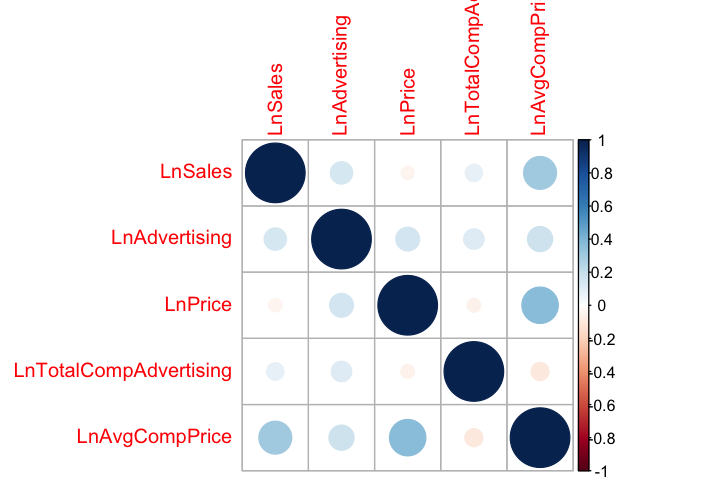

In [41]:
# Correlation plot

cor_matrix <- cor(brand_df[, 2:6])
corrplot(cor_matrix, method = "circle")

## 3.2 Descriptive Statistics

Key findings:
- The summary table shows a statistically significant negative relationship between the brand's price and the brand's sales and a significant positive relationship between competitor's price and the brand's sales. 

In [40]:
# Linear Regression

brand_lm <- lm(LnSales~ LnAdvertising + LnPrice + LnTotalCompAdvertising + LnAvgCompPrice, data=brand_df) 


stargazer(brand_lm, type="text")


                           Dependent variable:    
                       ---------------------------
                                 LnSales          
--------------------------------------------------
LnAdvertising                     0.005           
                                 (0.004)          
                                                  
LnPrice                         -0.422***         
                                 (0.151)          
                                                  
LnTotalCompAdvertising            0.011           
                                 (0.008)          
                                                  
LnAvgCompPrice                  0.486***          
                                 (0.093)          
                                                  
Constant                        13.370***         
                                 (0.779)          
                                                  
------------------------------

## Part4: Analyze the brand's performance and marketing effectiveness

## 4.1) Identify reactions of the brand’s advertising and price to competitors' advertising and price and vice versa.

- This can be done by analyzing which variables are temporally causing which other variables using 'Granger Causality tests'

Granger Causality tests:

is used to find which variables are temporally causing which other variables. 

The results show that: 

1) The brand's price is Granger causing the brand's sales at lag 8

- Changes in the brand's price have a predictive relationship with changes in the brand's sales that becomes apparent 8 periods later (8 weeks). 
- This suggests that it takes approximately two months for the full effect of price changes to reflect in sales numbers.

2) The brand's advertising is Granger causing average competitor's advertising at lag 13

- This suggests thatthe brand's advertising decisions influence or predict the advertising strategies of competitors, with this influence becoming evident after 13 periods (which could reflect a quarterly business cycle). 
- It could be that competitors are observing and responding to the brand's advertising initiatives with a time lag, indicating a reactive competitive environment.

3) Competitor's price is Granger causing the brand's sales at lag 1

- The competitor’s pricing decisions have an almost immediate effect on the brand’s sales (only 1 period lag). 
- This implies a very competitive market where consumers are quickly responsive to price changes from competitors, potentially due to easy comparison shopping or price sensitivity in the market.

4) Competitor's price is Granger causing the brand's advertising at lag 13 

- This result means that competitor pricing strategies are able to predict fluctuations in the brand’s advertising expenditure with a 13-period lag. 
- The brand may be analyzing competitor pricing trends and strategically adjusting their advertising spend to counteract those pricing changes. 
- The delayed reaction that could align with strategic planning cycles or budgeting processes.

5) Competitor's price is Granger causing the brand's price at lag 1

- The brand's pricing strategy seems to be responsive to competitor pricing actions with a lag of only 1 period, indicating a potentially aggressive pricing strategy that quickly reacts to the competition. 
- This could reflect a highly competitive market.

These results suggest that both the brand and its competitors are closely intertwined in their strategic actions.


In [7]:
# Granger causality tests 

# There are 5 endogenous variables -> 14 pairs to test
pairs <- list(
    c("LnSales", "LnAdvertising"),
    c("LnSales", "LnPrice"),
    c("LnSales", "LnTotalCompAdvertising"),
    c("LnSales", "LnAvgCompPrice"),
    c("LnAdvertising", "LnPrice"),
    c("LnAdvertising", "LnTotalCompAdvertising"),
    c("LnAdvertising", "LnAvgCompPrice"),
    c("LnPrice", "LnAdvertising"),
    c("LnPrice", "LnTotalCompAdvertising"),
    c("LnPrice", "LnAvgCompPrice"),
    c("LnTotalCompAdvertising", "LnPrice"),
    c("LnTotalCompAdvertising", "LnAdvertising"),
    c("LnAvgCompPrice", "LnPrice"),
    c("LnAvgCompPrice", "LnAdvertising")
)

# We do 13 lags as it cover roughly one quarter of a year, capturing any seasonal effects that occur on a quarterly basis. 
n_lag <- c(1,2,3,4,5,6,7,8,9,10,11,12,13)

# Create an empty list to store results for all pairs & all lags
granger_results_list <- list()

# For Loop: for Granger Causality Test

for (j in 1:length(pairs)) {
    
    granger_results_list[[j]] <- list()
    current_pair <- pairs[[j]]
    
    for (i in n_lag) {
        formula <- as.formula(paste(current_pair[1], "~", current_pair[2]))
        granger_results_list[[j]][[i]] <- grangertest(formula, order = i, data = brand_df)
    }
}

# Print Results
for (j in 1:length(pairs)) {
    cat("\nResults for pair:", paste(pairs[[j]], collapse=" and "), "\n")
    for (i in n_lag) {
        cat("Results for lag:", i, "\n")
        print(granger_results_list[[j]][[i]])
    }
}



Results for pair: LnSales and LnAdvertising 
Results for lag: 1 
Granger causality test

Model 1: LnSales ~ Lags(LnSales, 1:1) + Lags(LnAdvertising, 1:1)
Model 2: LnSales ~ Lags(LnSales, 1:1)
  Res.Df Df     F Pr(>F)
1    203                
2    204 -1 0.322  0.571
Results for lag: 2 
Granger causality test

Model 1: LnSales ~ Lags(LnSales, 1:2) + Lags(LnAdvertising, 1:2)
Model 2: LnSales ~ Lags(LnSales, 1:2)
  Res.Df Df      F Pr(>F)
1    200                 
2    202 -2 0.3369 0.7144
Results for lag: 3 
Granger causality test

Model 1: LnSales ~ Lags(LnSales, 1:3) + Lags(LnAdvertising, 1:3)
Model 2: LnSales ~ Lags(LnSales, 1:3)
  Res.Df Df      F Pr(>F)
1    197                 
2    200 -3 0.5586 0.6429
Results for lag: 4 
Granger causality test

Model 1: LnSales ~ Lags(LnSales, 1:4) + Lags(LnAdvertising, 1:4)
Model 2: LnSales ~ Lags(LnSales, 1:4)
  Res.Df Df      F Pr(>F)
1    194                 
2    198 -4 0.4997  0.736
Results for lag: 5 
Granger causality test

Model 1: LnSa

## 4.2) Identify business scenario based on the effects of 'own' and 'competitors' advertising and price actions on sales

- This is done by analyzing on whether variables are stationary or evolving? We adopt 

[1] Augmented Dickey-Fuller (ADF) Test (lag = 4) 

[2] Phillips-Perron (PP) test 

[3] KPSS Test 




- The results show that:
1) The brand's sales variable is "mean-stationary"
(ADF test: p-value = 0.01 and PP test: p-value = 0.01 -> reject null hypothesis of unit root) 

2) The brand's advertising variable is "mean-stationary"
(ADF test: p-value = 0.01 and PP test: p-value = 0.01 -> reject null hypothesis of unit root) 

3) The brand's price variable is "mean-stationary"
(ADF test: p-value = 0.01 and PP test: p-value = 0.01 -> reject null hypothesis of unit root) 

4) Competitor's advertising variable is "mean-stationary"
(ADF test: p-value = 0.01 and PP test: p-value = 0.01 -> reject null hypothesis of unit root) 

5) Competitor's price variable is "trend-stationary"
(ADF test: p-value = 0.01 and PP test: p-value = 0.01 -> reject null hypothesis of unit root)

- The results imply "Business as usual" based on the four strategic scenarios for long-term marketing effectiveness of Dekimpe and Hanssens (1999).

- Business-as-Usual combines stationary performance with stationary marketing. 

- In the case,the brand's sale (performance) is mean- stationary while other marketing mix of the brand and competitors are also stationary.

- This long-term marketing scenario indicate that one-short marketing campaigns (such as a temporary increase in advertising spending or temporary price reduction) have only temporary effects on performance.

- This results imply that the brand is competing in established market and brands, and therefore, marketing strategy efforts will only have temporary effect on the brand's sales.

In [9]:
library(aTSA)

# nlag = 4 is used in ADF Test based on managerial insight that any effect will not last more than 4 weeks

# Inspect own sales
adf.test(brand_df[,c(2)], nlag = 4, output = TRUE) 
pp.test(brand_df[,c(2)], output = TRUE) 
kpss.test(brand_df[,c(2)], output = TRUE)

# Inspect own advertising
adf.test(brand_df[,c(3)], nlag = 4, output = TRUE) 
pp.test(brand_df[,c(3)], output = TRUE) 
kpss.test(brand_df[,c(3)], output = TRUE)

# Inspect own price
adf.test(brand_df[,c(4)], nlag = 4, output = TRUE) 
pp.test(brand_df[,c(4)], output = TRUE) 
kpss.test(brand_df[,c(4)], output = TRUE)

# Inspect competitors'advertising
adf.test(brand_df[,c(5)], nlag = 4, output = TRUE) 
pp.test(brand_df[,c(5)], output = TRUE) 
kpss.test(brand_df[,c(5)], output = TRUE)

# Inspect competitors'price
adf.test(brand_df[,c(6)], nlag = 4, output = TRUE) 
pp.test(brand_df[,c(6)], output = TRUE) 
kpss.test(brand_df[,c(6)], output = TRUE)



Attaching package: ‘aTSA’

The following object is masked from ‘package:vars’:

    arch.test

The following object is masked from ‘package:graphics’:

    identify



Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag     ADF p.value
[1,]   0 -0.2514   0.571
[2,]   1 -0.1254   0.608
[3,]   2 -0.0850   0.619
[4,]   3 -0.0848   0.619
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -9.60    0.01
[2,]   1 -6.75    0.01
[3,]   2 -5.25    0.01
[4,]   3 -4.90    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -10.27    0.01
[2,]   1  -7.34    0.01
[3,]   2  -5.83    0.01
[4,]   3  -5.55    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 
Phillips-Perron Unit Root Test 
alternative: stationary 
 
Type 1: no drift no trend 
 lag   Z_rho p.value
   4 -0.0403   0.681
----- 
 Type 2: with drift no trend 
 lag Z_rho p.value
   4  -145    0.01
----- 
 Type 3: with drift and trend 
 lag Z_rho p.value
   4  -159    0.01
--------------- 
Note: p-value = 0.01 means p.value <= 0.01 
KPSS Unit Root Test 
alternative: nonstationary 
 
Type 1: no drift no trend 
 lag   stat p.value


## 4.3)  Explore linear interdependencies of variables in the dynamic system.

- The brand sales can be affected by its own advertising and price, as well as by competitors’ advertising and price. These variables, can all affect each other in a dynamic system. Moreover, sales can also be driven by exogenous effects of quarterly variation as well as a possible linear trend.

- We adopt Vector Autoregression (VAR) Model to analyze analyzing multiple time series data.

Key Findings:

1) Current average comptitors' price:

- The past average competitor price plays a significant role in determining its current value, and there is a positive trend in the average competitor price over time. 

2) The brand's advertising:

 - Even without the effect of the lagged variables, there's a constant effect on LnAdvertising.
 - This may suggests that the brand consistently invests in advertising or there's a consistent interest or awareness about the brand in the market. 
 
3) The brand's price:

- There is a strong inherent downward trend or level in LnPrice, independent of the other factors in the model.

In [10]:
# VAR model (Vector Auto Regression)

brand_endovars = brand_df[,c(2,3,4,5,6)] # brand(sales/ads/price) & competitors(price/ads) are endogenous vars
brand_exovars = brand_df[, c(7,8,9)] # Quarters' variable = exogeneous factor impact sales

# VARselect: make decision on the optimal 'lag length' for a Vector Autoregressive (VAR) model 
# Use lag.max 13: as strategic management is based on quarter level. 

VARselect(brand_endovars, lag.max = 13, type = "both", season = NULL, exogen = brand_exovars)

,1,2,3,4,5,6,7,8,9,10,11,12,13
AIC(n),-1.056780e+01,-1.057709e+01,-1.054298e+01,-1.046162e+01,-1.028680e+01,-1.027059e+01,-1.027883e+01,-1.033261e+01,-1.027483e+01,-1.019293e+01,-1.014883e+01,-1.013539e+01,-1.026432e+01
HQ(n),-1.022676e+01,-1.006552e+01,-9.860891e+00,-9.609015e+00,-9.263673e+00,-9.076936e+00,-8.914652e+00,-8.797917e+00,-8.569611e+00,-8.317188e+00,-8.102566e+00,-7.918610e+00,-7.877017e+00
SC(n),-9.725573e+00,-9.313742e+00,-8.858515e+00,-8.356044e+00,-7.760108e+00,-7.322777e+00,-6.909899e+00,-6.542570e+00,-6.063670e+00,-5.560652e+00,-5.095437e+00,-4.660887e+00,-4.368699e+00
FPE(n),2.574303e-05,2.553290e-05,2.647521e-05,2.882068e-05,3.450881e-05,3.533551e-05,3.539859e-05,3.398427e-05,3.660330e-05,4.054565e-05,4.343969e-05,4.536233e-05,4.131729e-05


In [11]:
# Estimating the VAR model (above result suggest using p=1 as lag order in VARmodel)

brand_varsmodel <- VAR(brand_endovars, p=1, type = "both", exogen = brand_exovars)
summary(brand_varsmodel,"LnSales") 
summary(brand_varsmodel,"LnAdvertising") 
summary(brand_varsmodel,"LnPrice") 
summary(brand_varsmodel,"LnTotalCompAdvertising") 
summary(brand_varsmodel,"LnAvgCompPrice")


VAR Estimation Results:
Endogenous variables: LnSales, LnAdvertising, LnPrice, LnTotalCompAdvertising, LnAvgCompPrice 
Deterministic variables: both 
Sample size: 206 
Log Likelihood: -314.551 
Roots of the characteristic polynomial:
0.5198 0.3273 0.2151 0.08672 0.01931
Call:
VAR(y = brand_endovars, p = 1, type = "both", exogen = brand_exovars)


Estimation results for equation LnSales: 
LnSales = LnSales.l1 + LnAdvertising.l1 + LnPrice.l1 + LnTotalCompAdvertising.l1 + LnAvgCompPrice.l1 + const + trend + Qrtr1 + Qrtr2 + Qrtr3 

                            Estimate Std. Error t value Pr(>|t|)    
LnSales.l1                 0.2193606  0.0720058   3.046 0.002635 ** 
LnAdvertising.l1          -0.0029289  0.0035336  -0.829 0.408194    
LnPrice.l1                -0.0714023  0.1494248  -0.478 0.633291    
LnTotalCompAdvertising.l1  0.0007126  0.0074520   0.096 0.923918    
LnAvgCompPrice.l1          0.1883433  0.1755440   1.073 0.284630    
const                     10.9265852  1.4141156   7


VAR Estimation Results:
Endogenous variables: LnSales, LnAdvertising, LnPrice, LnTotalCompAdvertising, LnAvgCompPrice 
Deterministic variables: both 
Sample size: 206 
Log Likelihood: -314.551 
Roots of the characteristic polynomial:
0.5198 0.3273 0.2151 0.08672 0.01931
Call:
VAR(y = brand_endovars, p = 1, type = "both", exogen = brand_exovars)


Estimation results for equation LnAdvertising: 
LnAdvertising = LnSales.l1 + LnAdvertising.l1 + LnPrice.l1 + LnTotalCompAdvertising.l1 + LnAvgCompPrice.l1 + const + trend + Qrtr1 + Qrtr2 + Qrtr3 

                           Estimate Std. Error t value Pr(>|t|)  
LnSales.l1                -1.019212   1.478954  -0.689   0.4915  
LnAdvertising.l1           0.029796   0.072579   0.411   0.6819  
LnPrice.l1                 0.074947   3.069091   0.024   0.9805  
LnTotalCompAdvertising.l1 -0.108762   0.153060  -0.711   0.4782  
LnAvgCompPrice.l1          6.138176   3.605563   1.702   0.0903 .
const                     58.801879  29.045046   2.025   


VAR Estimation Results:
Endogenous variables: LnSales, LnAdvertising, LnPrice, LnTotalCompAdvertising, LnAvgCompPrice 
Deterministic variables: both 
Sample size: 206 
Log Likelihood: -314.551 
Roots of the characteristic polynomial:
0.5198 0.3273 0.2151 0.08672 0.01931
Call:
VAR(y = brand_endovars, p = 1, type = "both", exogen = brand_exovars)


Estimation results for equation LnPrice: 
LnPrice = LnSales.l1 + LnAdvertising.l1 + LnPrice.l1 + LnTotalCompAdvertising.l1 + LnAvgCompPrice.l1 + const + trend + Qrtr1 + Qrtr2 + Qrtr3 

                            Estimate Std. Error t value Pr(>|t|)    
LnSales.l1                -0.0047166  0.0358297  -0.132    0.895    
LnAdvertising.l1           0.0023198  0.0017583   1.319    0.189    
LnPrice.l1                 0.0431995  0.0743530   0.581    0.562    
LnTotalCompAdvertising.l1  0.0005704  0.0037081   0.154    0.878    
LnAvgCompPrice.l1          0.1261402  0.0873498   1.444    0.150    
const                     -4.4287596  0.7036570  -6


VAR Estimation Results:
Endogenous variables: LnSales, LnAdvertising, LnPrice, LnTotalCompAdvertising, LnAvgCompPrice 
Deterministic variables: both 
Sample size: 206 
Log Likelihood: -314.551 
Roots of the characteristic polynomial:
0.5198 0.3273 0.2151 0.08672 0.01931
Call:
VAR(y = brand_endovars, p = 1, type = "both", exogen = brand_exovars)


Estimation results for equation LnTotalCompAdvertising: 
LnTotalCompAdvertising = LnSales.l1 + LnAdvertising.l1 + LnPrice.l1 + LnTotalCompAdvertising.l1 + LnAvgCompPrice.l1 + const + trend + Qrtr1 + Qrtr2 + Qrtr3 

                           Estimate Std. Error t value Pr(>|t|)    
LnSales.l1                 0.938296   0.666515   1.408    0.161    
LnAdvertising.l1          -0.046437   0.032709  -1.420    0.157    
LnPrice.l1                 1.119916   1.383136   0.810    0.419    
LnTotalCompAdvertising.l1  0.301537   0.068979   4.371    2e-05 ***
LnAvgCompPrice.l1          0.487102   1.624906   0.300    0.765    
const                      


VAR Estimation Results:
Endogenous variables: LnSales, LnAdvertising, LnPrice, LnTotalCompAdvertising, LnAvgCompPrice 
Deterministic variables: both 
Sample size: 206 
Log Likelihood: -314.551 
Roots of the characteristic polynomial:
0.5198 0.3273 0.2151 0.08672 0.01931
Call:
VAR(y = brand_endovars, p = 1, type = "both", exogen = brand_exovars)


Estimation results for equation LnAvgCompPrice: 
LnAvgCompPrice = LnSales.l1 + LnAdvertising.l1 + LnPrice.l1 + LnTotalCompAdvertising.l1 + LnAvgCompPrice.l1 + const + trend + Qrtr1 + Qrtr2 + Qrtr3 

                            Estimate Std. Error t value Pr(>|t|)    
LnSales.l1                -0.0237235  0.0244865  -0.969    0.334    
LnAdvertising.l1          -0.0001493  0.0012017  -0.124    0.901    
LnPrice.l1                -0.0321749  0.0508138  -0.633    0.527    
LnTotalCompAdvertising.l1  0.0019024  0.0025342   0.751    0.454    
LnAvgCompPrice.l1          0.5357288  0.0596959   8.974 2.33e-16 ***
const                     -2.3340482 

## 4.4) Identify significant dynamic impact of the different variables on each other? Focus on the significance of the effect variation as well as a possible linear trend.

- We adopt 'IRF (impulse response function)' to analyze how one variable responds to a shock in another variable overtime.

Results:

1) The brand's Sales: 

- Cumulative IRF: For each variable at 68% confidence interval, the zero red line (indicate no effect) stays between the confidence interval. 
- Therefore, in cumulative perspectives, there's no significant effect of other variables on the brand's sales. 


2) The brand's Advertising:

- Cumulative IRF: At a 68% confidence interval, there is a positive cumulative effect of competitor's price on the brand's advertising. 
- As times go on the brand's advertising continues to be positively affected by one time shock of competitor's price. 


3) The brand's Price:

- Cumulative IRF: At a 68% confidence interval, there is a cumulative negative effect of the brand's sale on the brand's price. 
- There is a positive cumulative effect of the brand's advertising and competitor's price on the brand's price. 


4) Competitor's Advertising: 

- Cumulative IRF: At a 68% confidence interval, there is a cumulative positive effect of the brand's sale on Competitor's advertising. 


5) Competitor's Price: 

- Cumulative IRF: At a 68% confidence interval, there is a cumulative positive effect of the brand's price and Competitor's advertising on Competitor's price. 
- As times go on Competitor's price continues to be positively affected by one time shock of the brand's price and its own advertising. 


#### Key Insights:

1) Reactive Market Dynamics: 

- The market seems to be highly reactive. The brand’s sales don't appear to be influenced by other factors within the observed confidence interval, which means they might have a stable demand or strong brand loyalty. 
- However, when it comes to pricing and advertising, The brand is sensitive to competitor actions, and vice versa.

2) Pricing as a Competitive Tool:

- Both the brand and its competitor seem to employ pricing as a competitive tool. 

3) Advertising to Counteract Pricing Movements: 

- The brand boosts its advertising when its competitor raises prices. 
- This suggests that the brand might use advertising to highlight its value proposition or specific promotions when it senses vulnerability in the competitor due to a price increase.

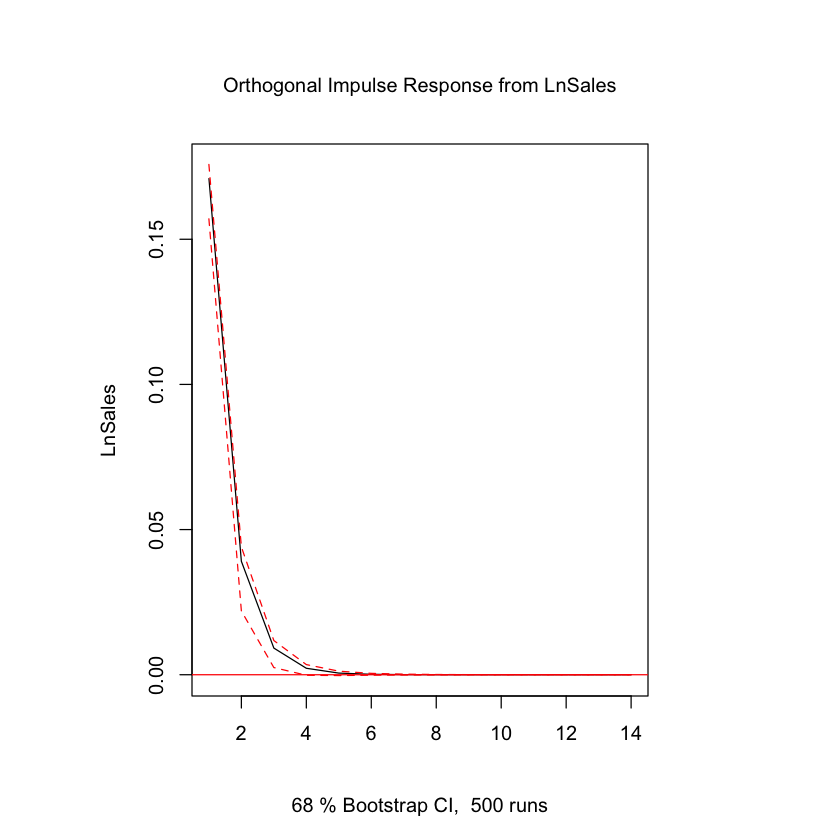

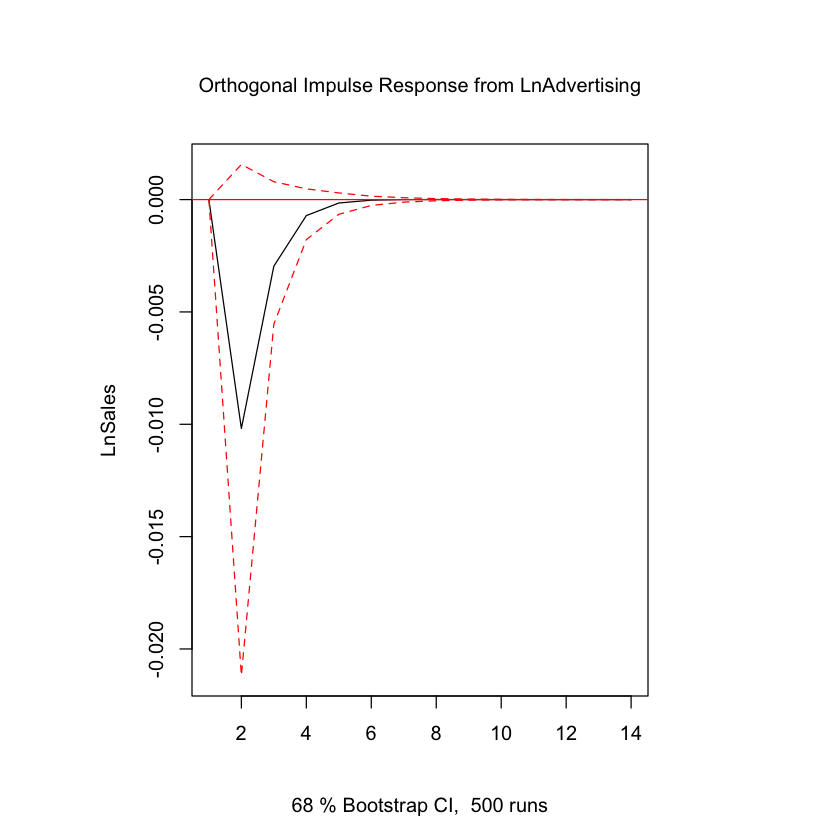

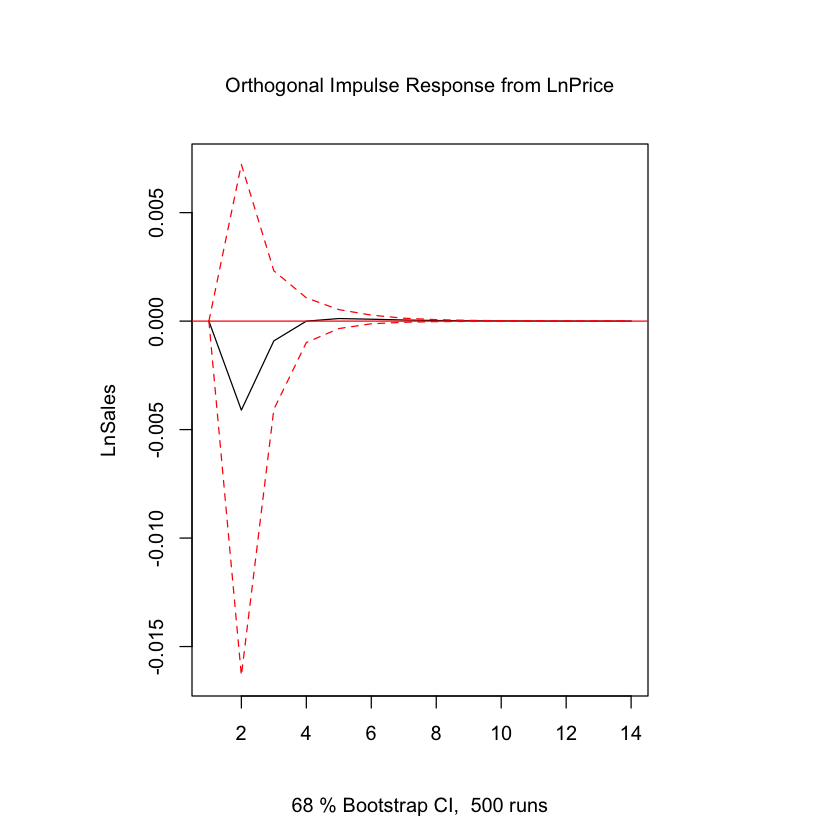

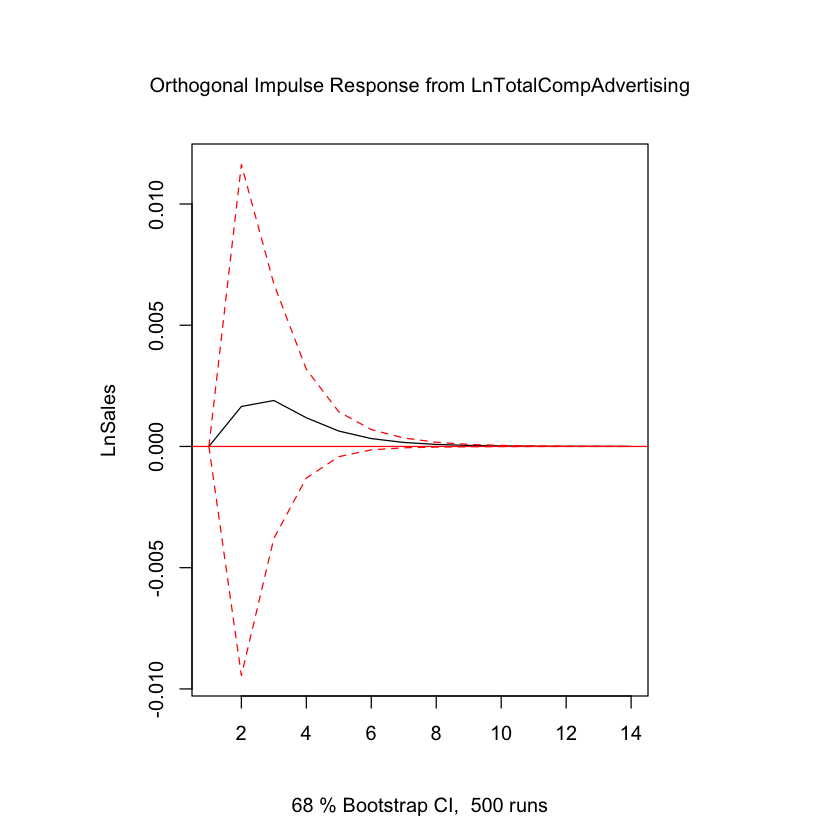

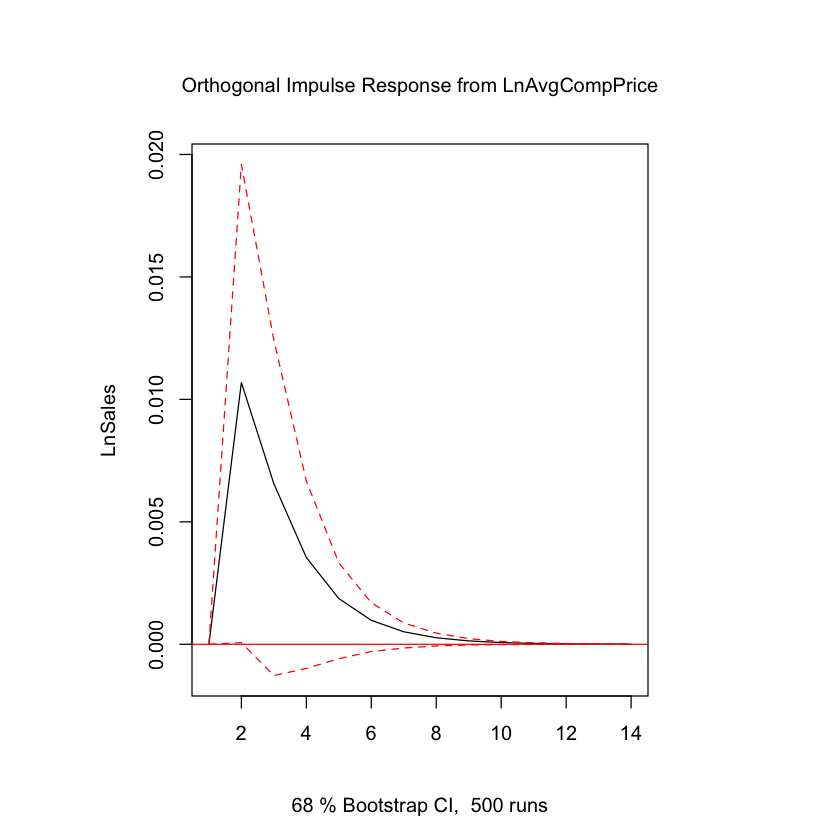

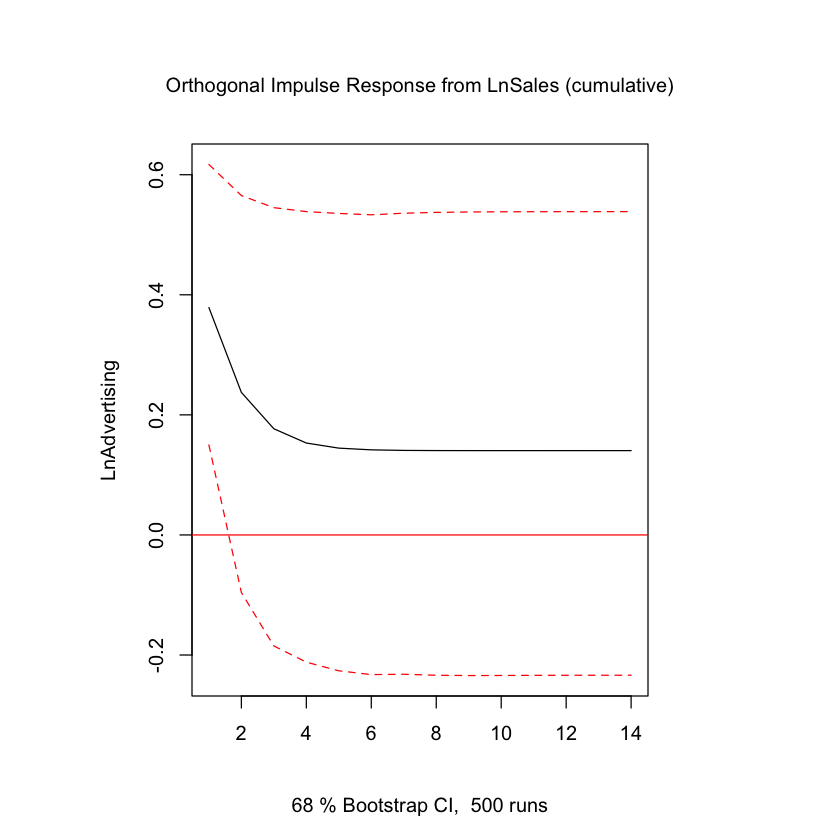

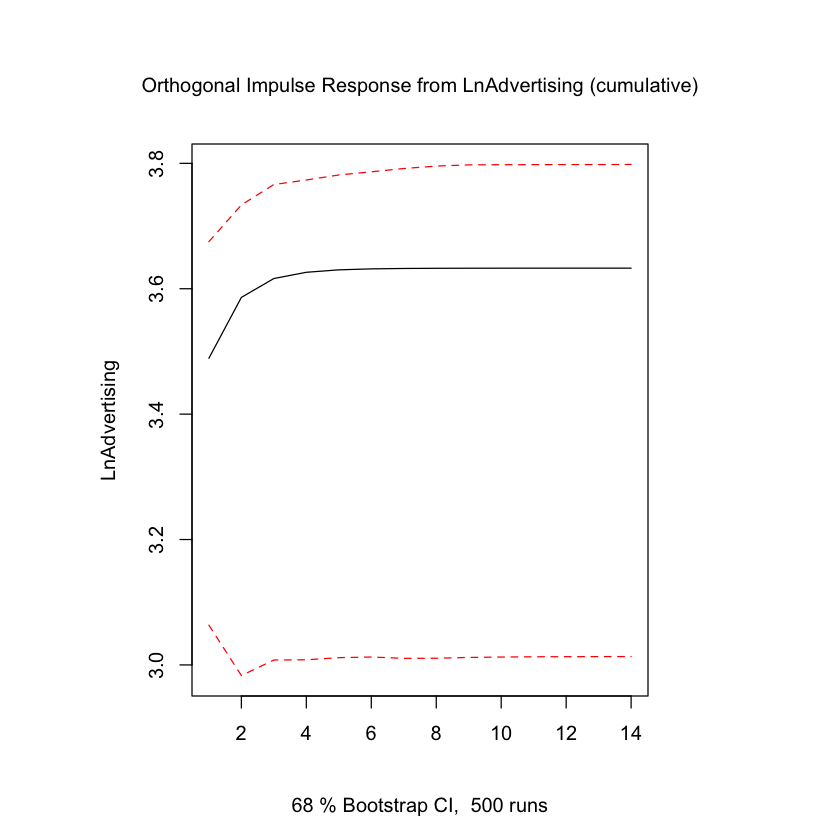

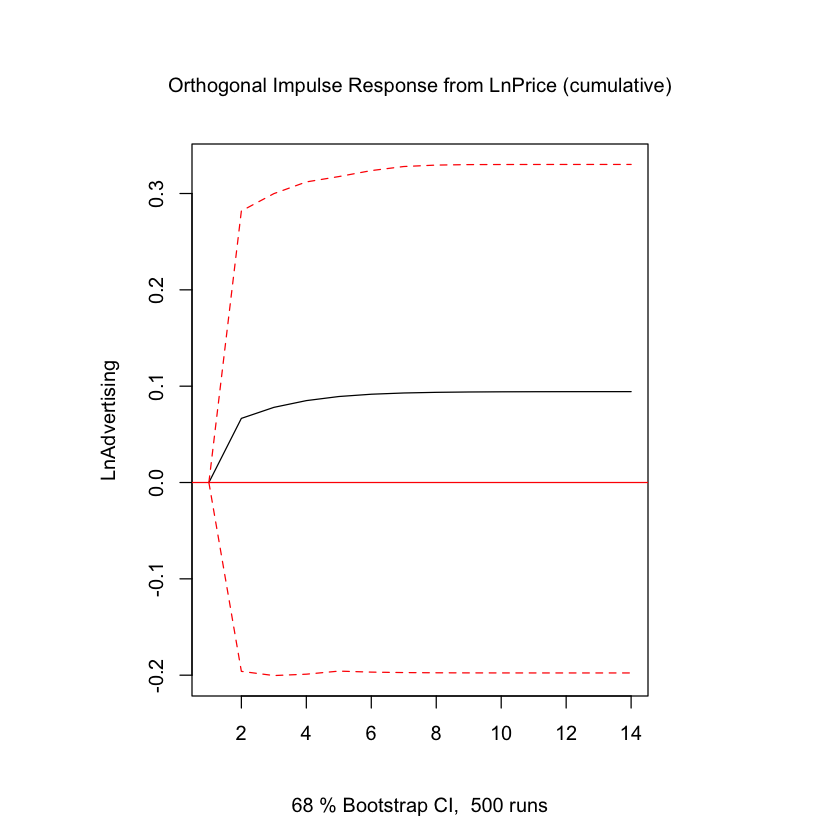

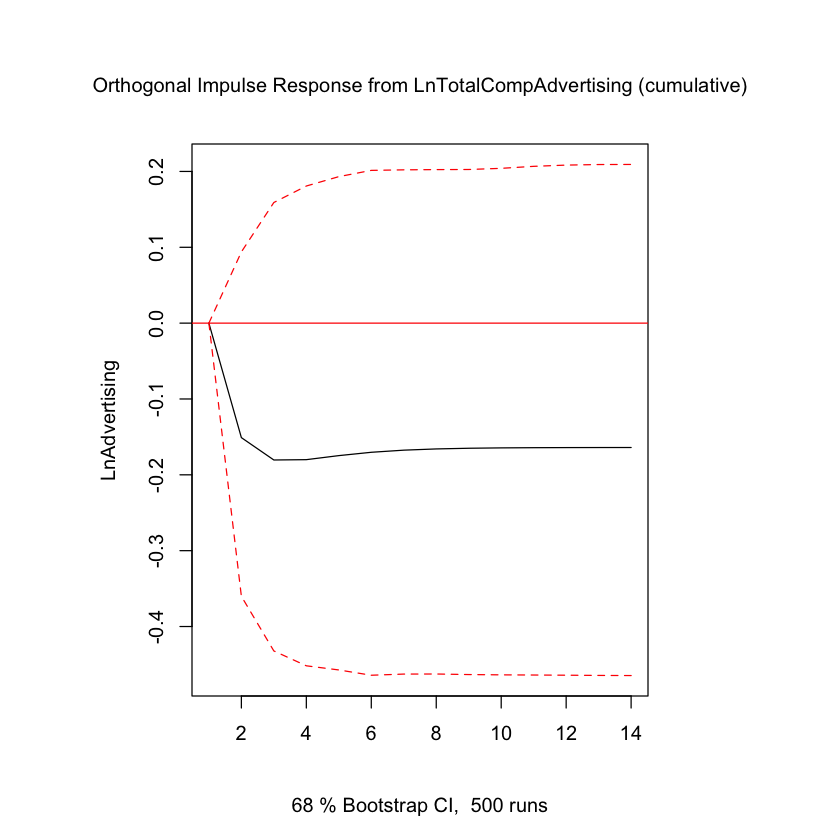

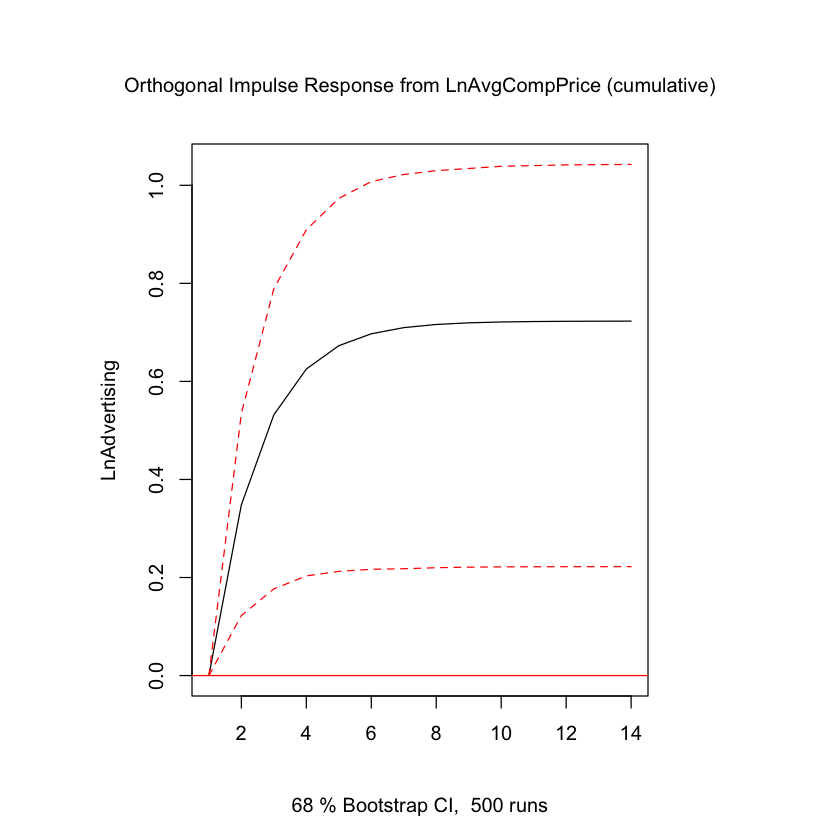

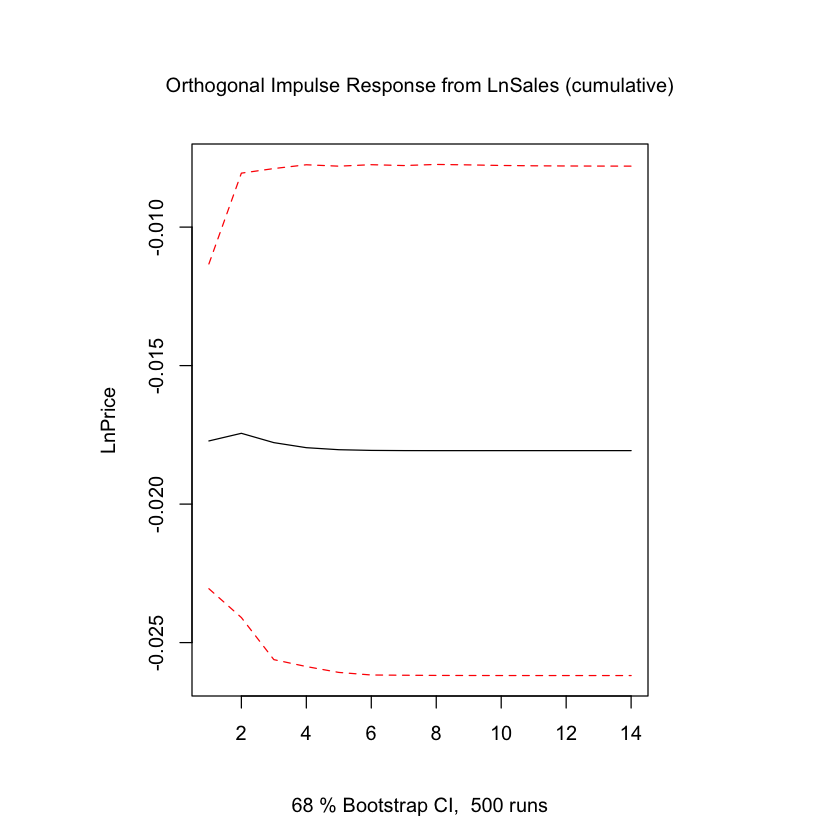

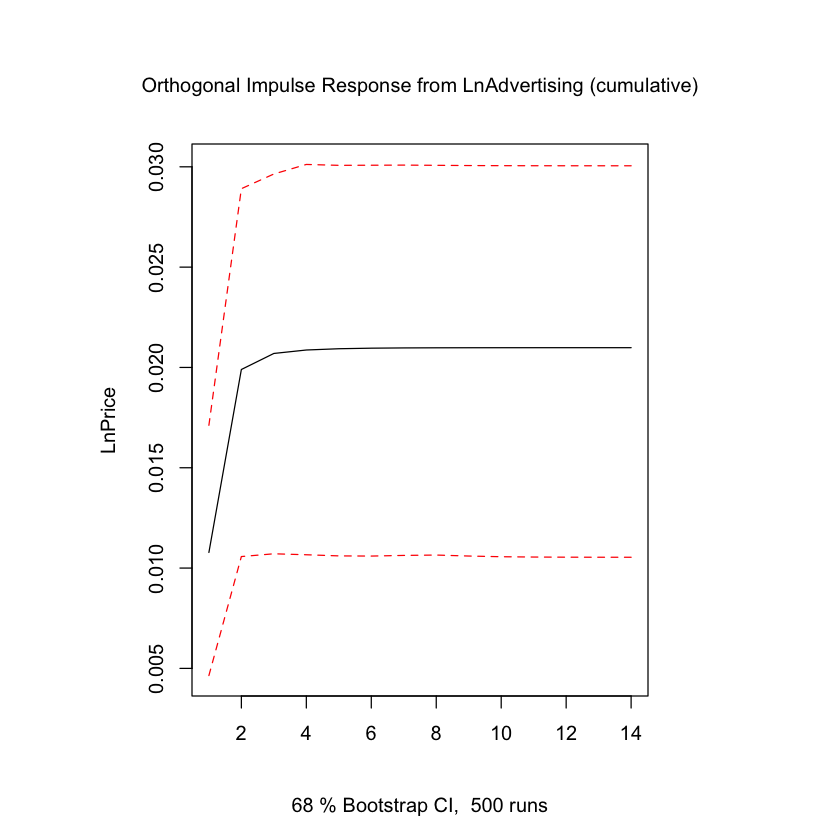

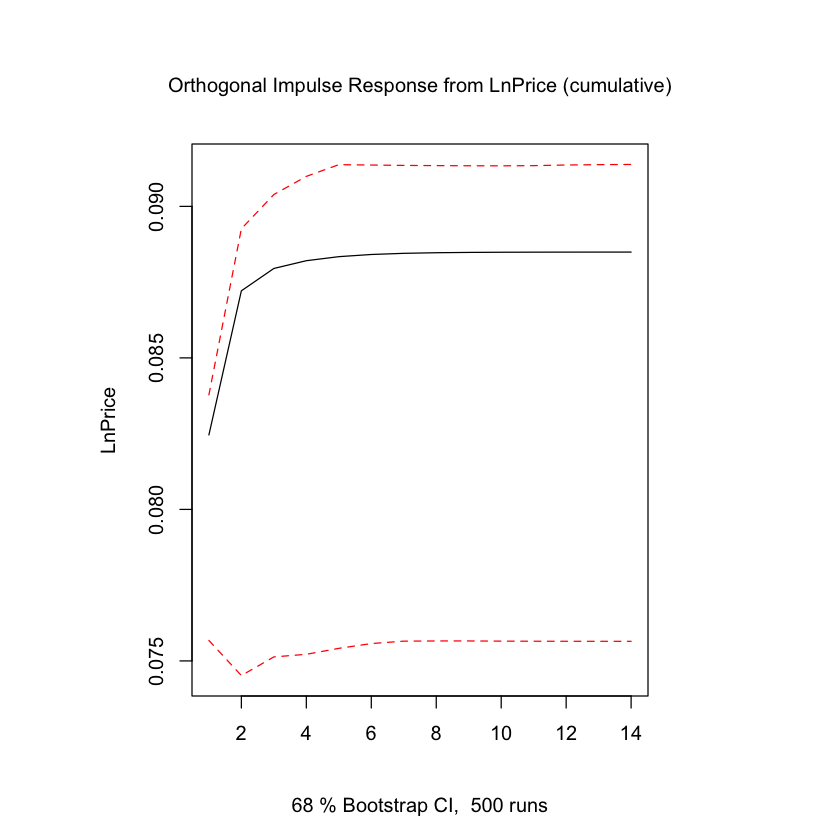

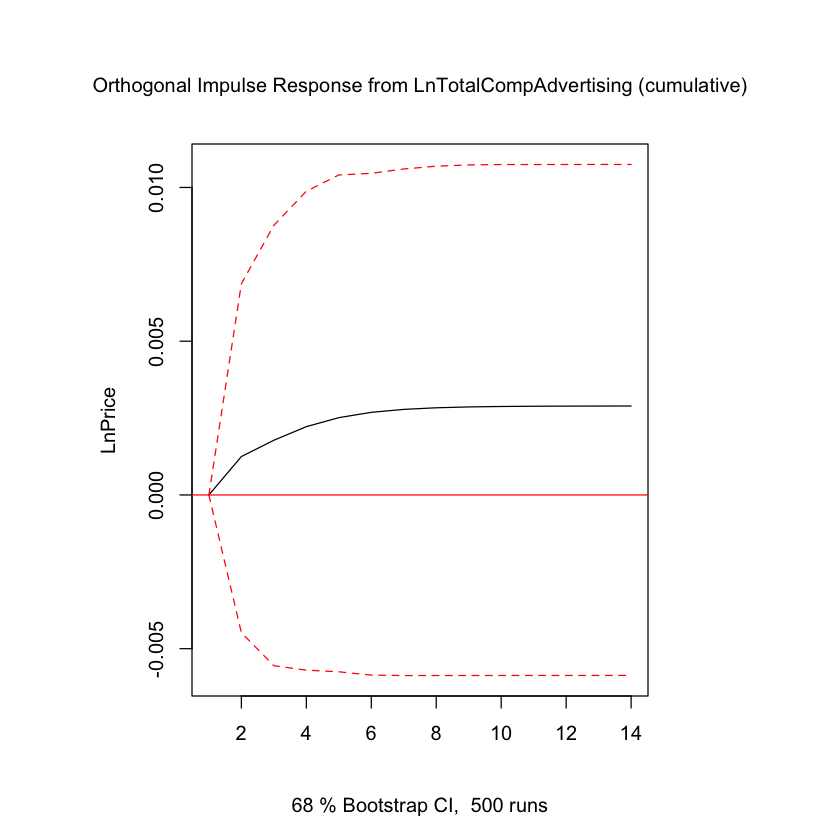

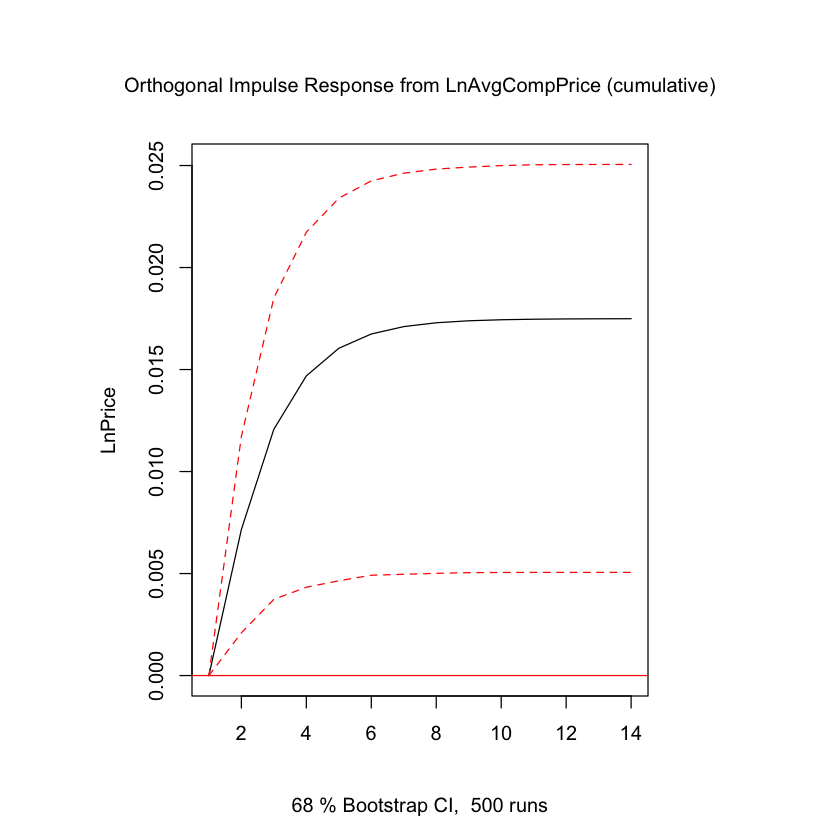

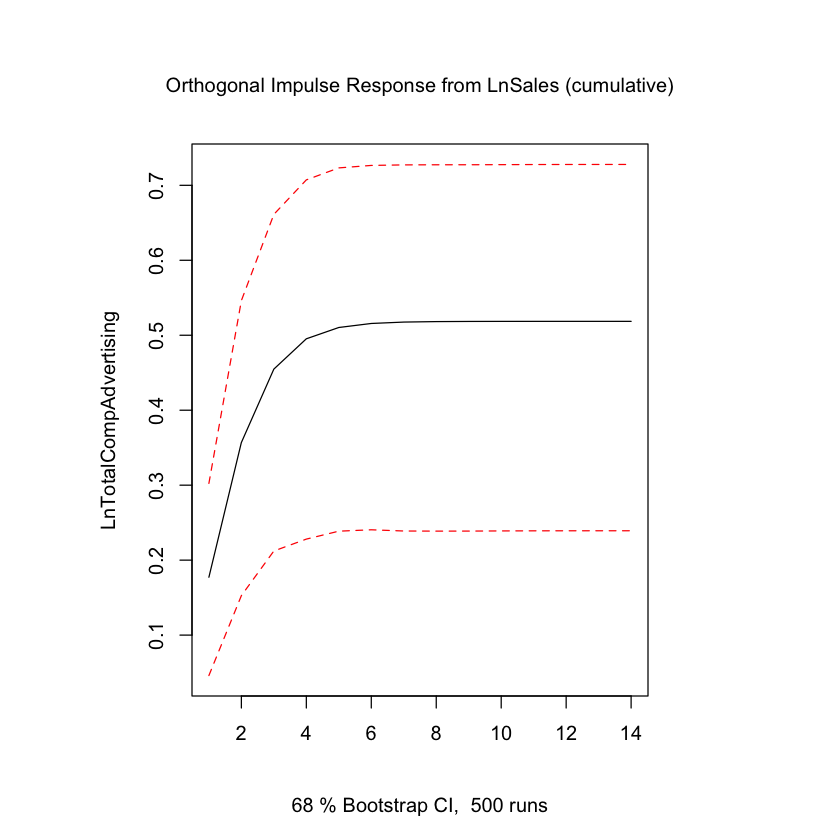

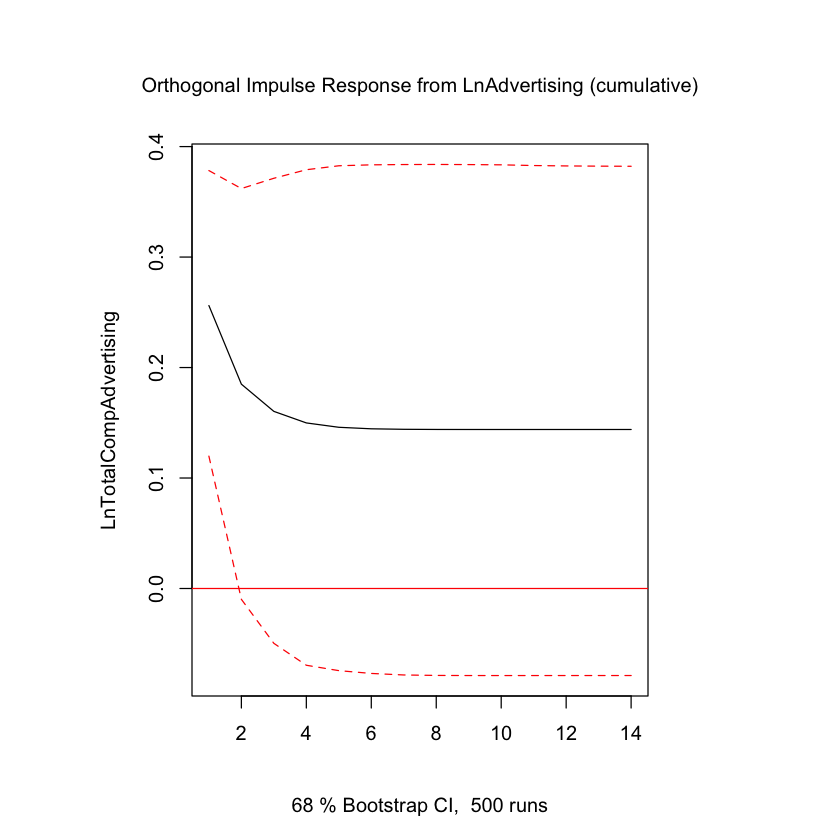

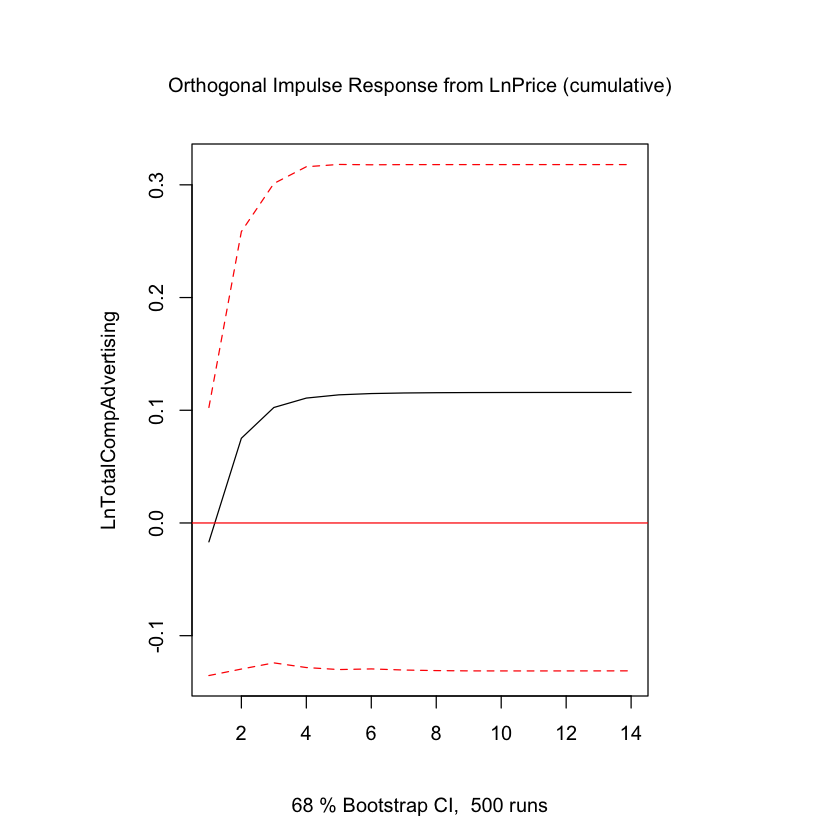

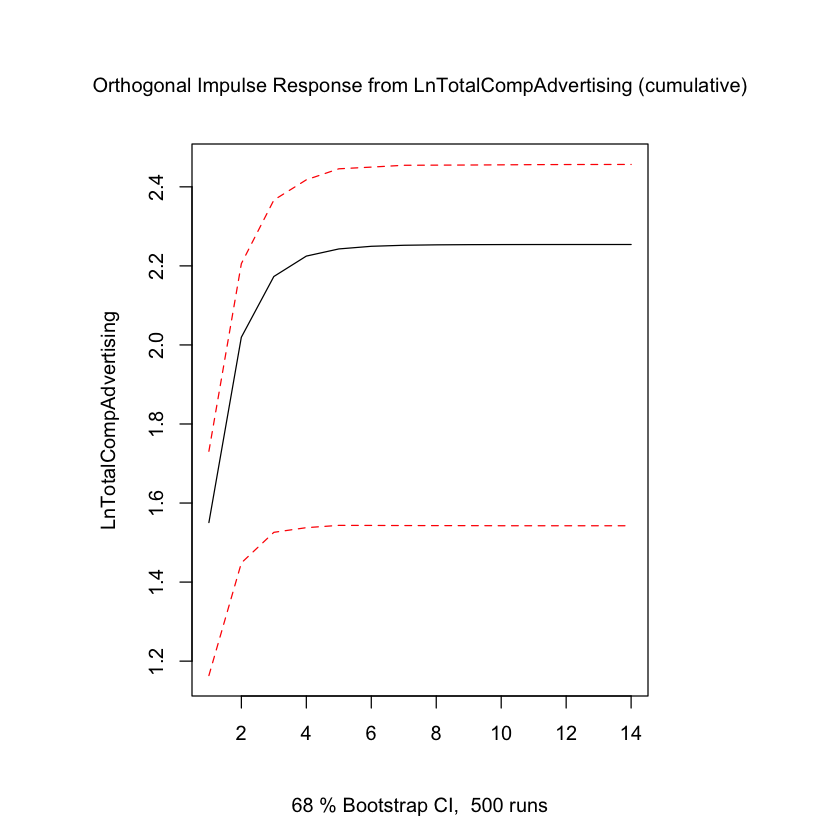

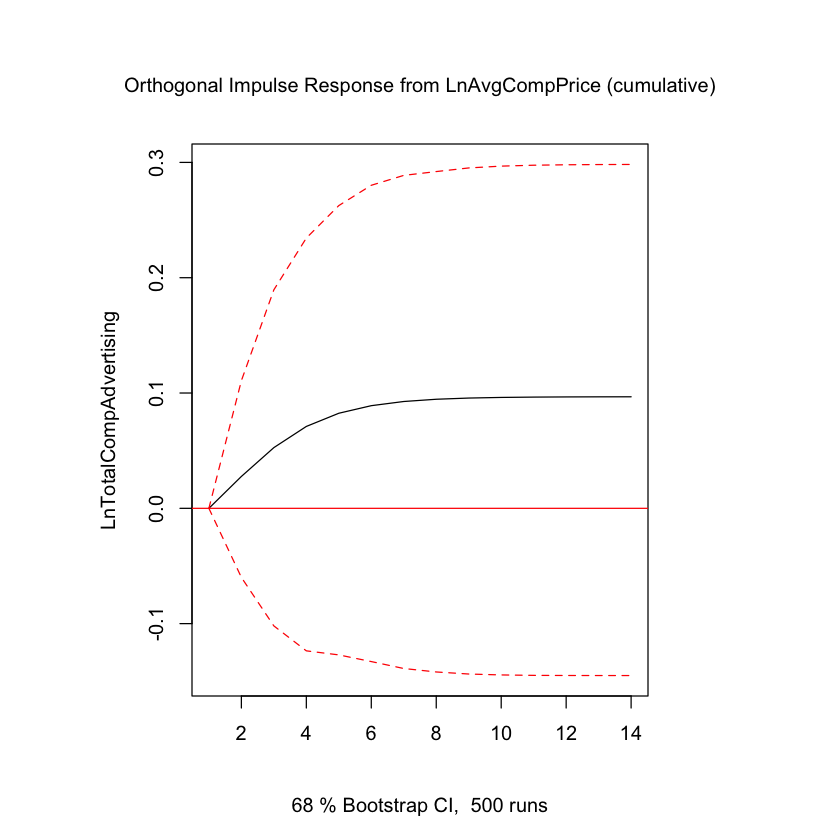

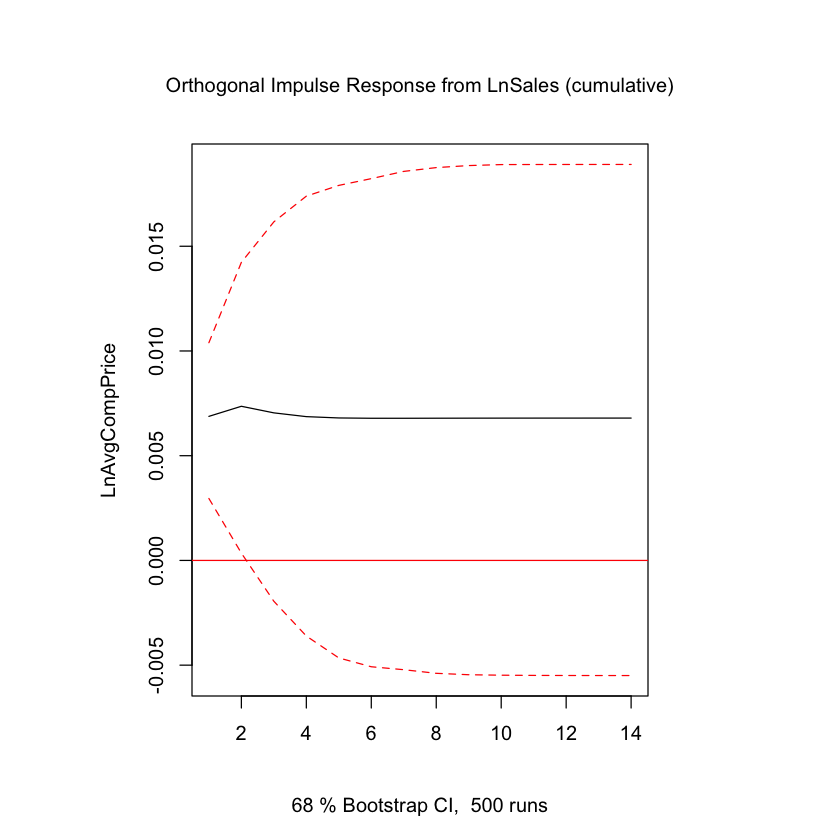

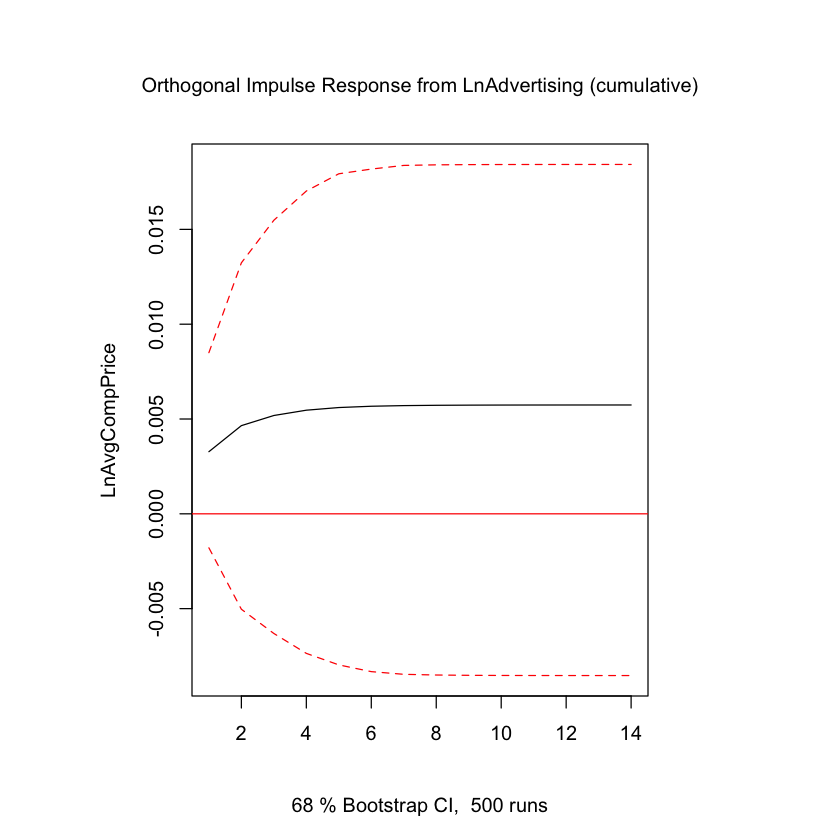

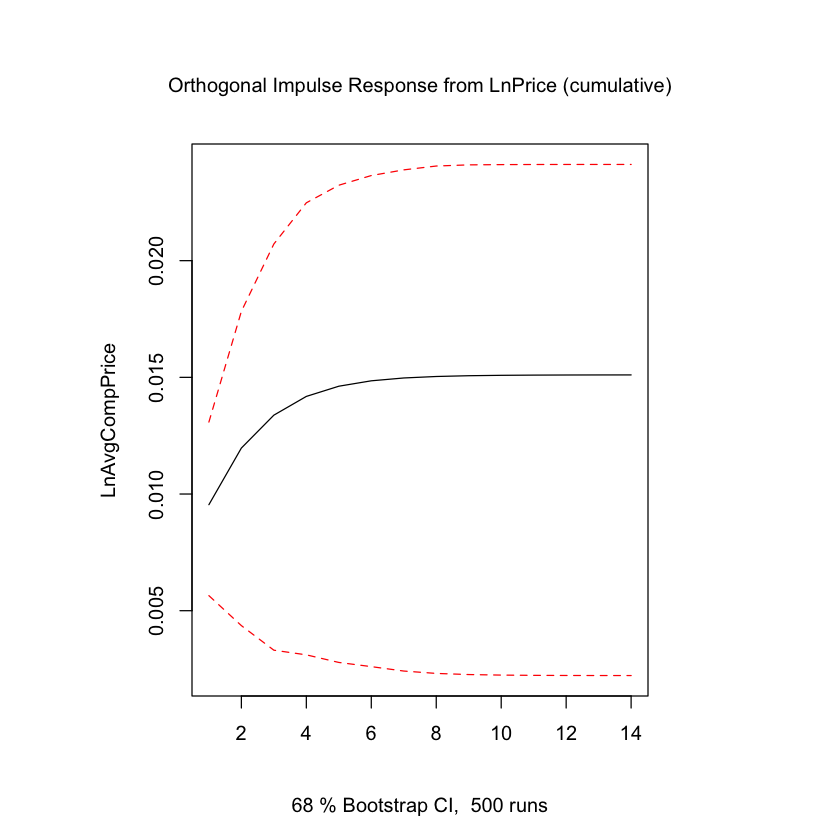

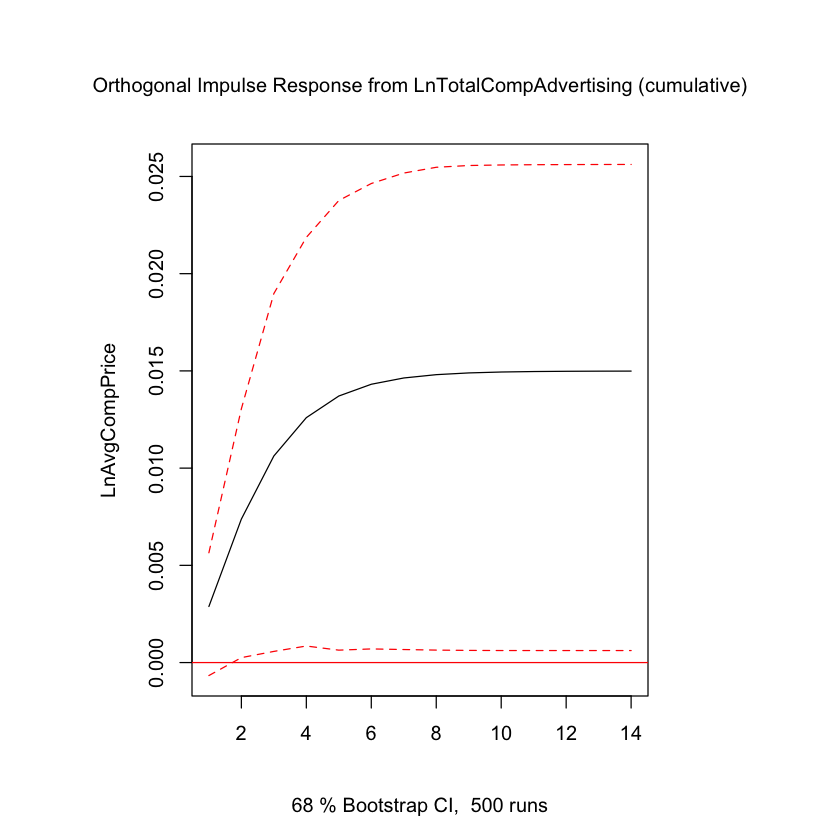

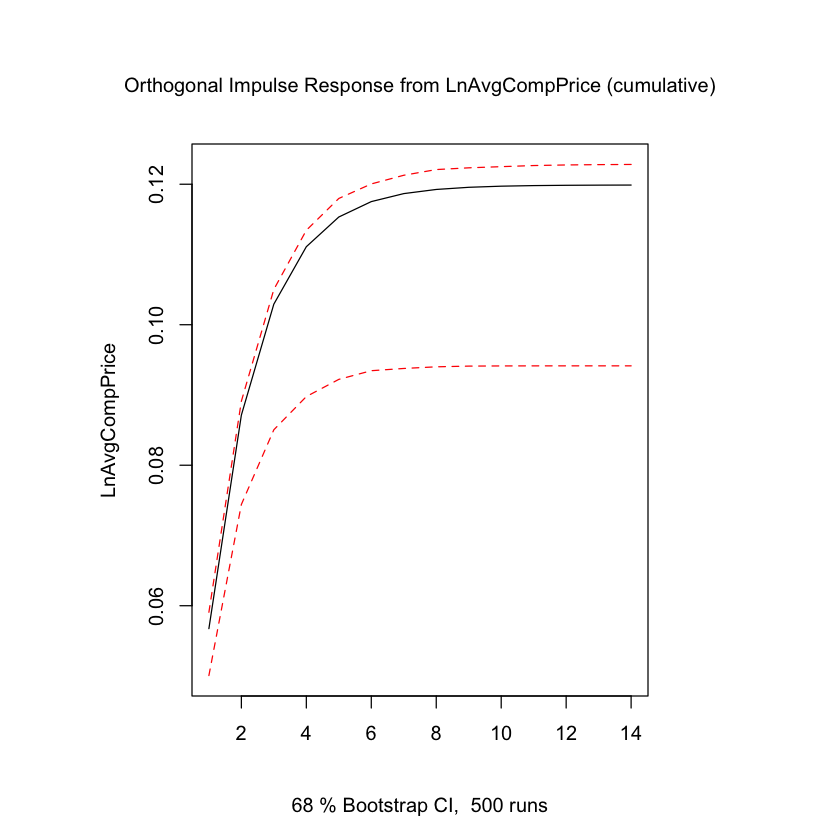

In [13]:
# From VAR model (brand_varsmodel)
# Estimate at 68% confidence interval

# Plot 1 -----------
brandirf1 <- irf(brand_varsmodel, impulse = NULL, response = "LnSales", n.ahead = 13,ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.68,
runs = 500) 

plot(brandirf1)


# Plot 2 -----------
brandirf2 <- irf(brand_varsmodel, impulse = NULL, response = "LnAdvertising", n.ahead = 13, ortho = TRUE, cumulative = TRUE, boot = TRUE, ci = 0.68,
runs = 500)

plot(brandirf2)


# Plot 3 -----------
brandirf3 <- irf(brand_varsmodel, impulse = NULL, response = "LnPrice", n.ahead = 13, ortho = TRUE, cumulative = TRUE, boot = TRUE, ci = 0.68,
runs = 500)

plot(brandirf3)

# Plot 4 -----------
brandirf4 <- irf(brand_varsmodel, impulse = NULL, response = "LnTotalCompAdvertising", n.ahead = 13, ortho = TRUE, cumulative = TRUE, boot = TRUE, ci = 0.68,
runs = 500)

plot(brandirf4)


# Plot 5 -----------
brandirf5 <- irf(brand_varsmodel, impulse = NULL, response = "LnAvgCompPrice", n.ahead = 13, ortho = TRUE, cumulative = TRUE, boot = TRUE, ci = 0.68,
runs = 500)

plot(brandirf5) 



## 4.5) Find  importance of each driver’s past in explaining observed variance in both the brand’s performance (sales) and marketing (advertising and price)

- We adopt 'FEVD'

- FEVD ( Forecast Error Variance Decomposition) is used to reveal how the forecast error variance in one variable can be explained by its own past shocks and all the shocks of the other endogenous variables. Therefore, it shows the relative importance of each variable in having contributed to the variation in the performance variable.

#### Results:

Based on 'quarterly' perspective

1) Variation in the brand's sales is almost 98% determined or explained by its past and only a little extent from other variables.

2) Variation in the brand's advertising is approximately 97%, explained by its past. Only a small extent of 1.3% of its sales and 1.3% from competitor's prices affect the brand's advertising.

3) Variation in the brand's price is approximately 91%, explained by its past. A small extent of 4% from the brand's sales, 2% from the brand's advertising, and 1% of competitor's price contribute to the variation.

4) Variation in competitor's advertising is explained 94% by its past, 2.6% by the brand's sales, and 2.5% by the brand's advertising.

5) Variation in competitor's price is explained 95% by its past, 2% by the brand's price, and 1% by the brand's sales.

$LnSales
        LnSales LnAdvertising      LnPrice LnTotalCompAdvertising
 [1,] 1.0000000   0.000000000 0.0000000000           0.000000e+00
 [2,] 0.9923271   0.003353394 0.0005435511           8.774409e-05
 [3,] 0.9905548   0.003620388 0.0005678278           2.028511e-04
 [4,] 0.9900958   0.003634418 0.0005674734           2.478174e-04
 [5,] 0.9899708   0.003634666 0.0005678445           2.607482e-04
 [6,] 0.9899367   0.003634560 0.0005680750           2.641376e-04
 [7,] 0.9899274   0.003634526 0.0005681556           2.650086e-04
 [8,] 0.9899249   0.003634517 0.0005681795           2.652334e-04
 [9,] 0.9899242   0.003634514 0.0005681863           2.652921e-04
[10,] 0.9899240   0.003634514 0.0005681881           2.653075e-04
[11,] 0.9899240   0.003634514 0.0005681886           2.653116e-04
[12,] 0.9899240   0.003634513 0.0005681887           2.653127e-04
[13,] 0.9899240   0.003634513 0.0005681888           2.653130e-04
      LnAvgCompPrice
 [1,]    0.000000000
 [2,]    0.003688215
 [3,

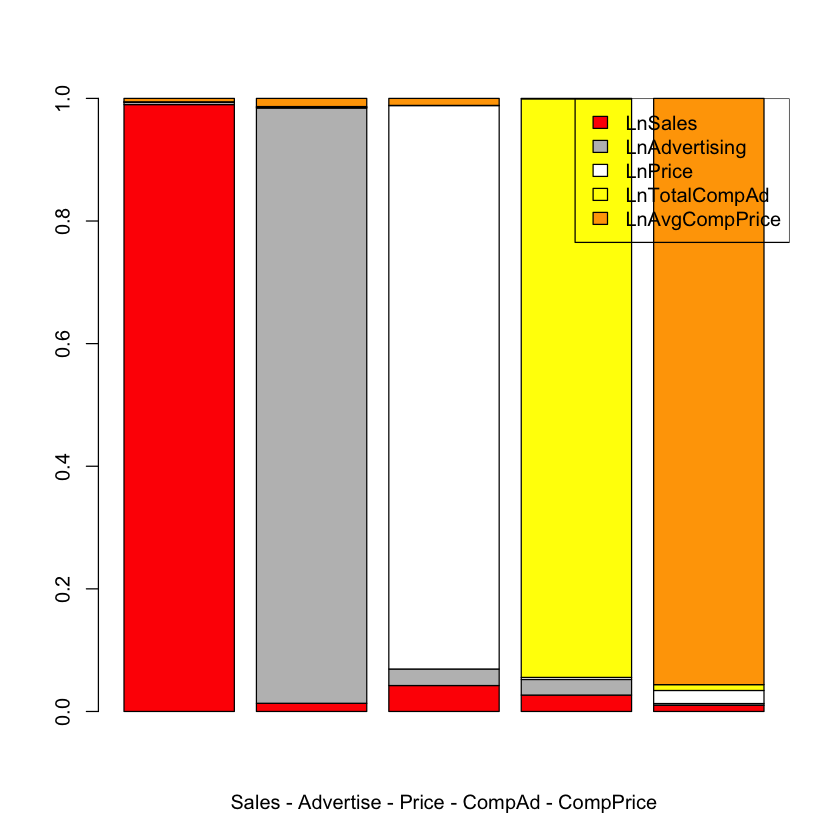

In [26]:
# Calculate FEVD
brand_fevd <- fevd(brand_varsmodel, n.ahead = 13) 
brand_fevd

# Extract result & transform data
barbasis1 = brand_fevd[1]
barbasis2 = as.matrix(unlist(barbasis1),ncol = 5, byrow = TRUE)
bartry = Reduce(rbind,brand_fevd) 
bartry2 = t(bartry)
bartry2 = bartry2[,c(13,26,39,52,65)]

# Plot FEVD
library(ggplot2) 
library(RColorBrewer)

barplot(bartry2, col = c("red", "grey", "white", "yellow", "orange"), xlab = "Sales - Advertise - Price - CompAd - CompPrice")
legend("topright", legend = c("LnSales", "LnAdvertising", "LnPrice", "LnTotalCompAd", "LnAvgCompPrice"), fill = c("red", "grey", "white", "yellow", "orange"))

## Part 5: Conclusion: Managerial Insights & Recommendations

## Managerial Insights:

Understanding the brand's Market Dynamics

#### Time- Series Analysis:

Our comprehensive time-series analysis reveals a competitive market where the brand's pricing strategies and competitors' moves intricately interplay. 

1) Sales and Pricing Trends: 

- The brand's sales trajectory shows sensitivity to pricing fluctuations. 

- Our data exhibit a clear pattern where the brand's sales inversely correlate with its own price adjustments but interestingly improve with competitors' price hikes. 

- This suggests a market perception of the brand as a value proposition relative to competitors.

2) Advertising Influence: 

- The brand's advertising efforts was observed, creating windows where competitors potentially capitalized on market attention. 

- The brand's advertising efforts have been found to impact competitors' strategies, suggesting an active market response to brand's marketing campaigns.


####  Causality Test:

1) Price as a Leading Indicator: 

- The brand's pricing decisions at lag 8 emerge as a leading indicator for sales performance, affirming pricing strategy as a critical lever in forecasting sales outcomes.

2) Advertising Wars: 

- There's a two-way impact in advertising strategy - the brand influences competitors' advertising spend, and vice versa, especially at lag 13, indicating a potential market rhythm that savvy marketers can exploit.

3) Immediate Competitive Response: 

- Competitors' price strategies instantly affect the brand's sales and advertising response, highlighting the need for agility in the brand's marketing strategy.


#### Stationarity Test:

1) Stability in Change: 

- Despite market fluctuations, our tests reveal a "mean-stationary" status for all variables except for competitors' prices, which are "trend-stationary." 

- This underscores a stable competitive landscape where actions lead to predictable reactions within the market.

2) Temporary Shocks: 

- Given the stationarity of variables, we identify a "Business-as-Usual" scenario, where any marketing campaign yields only transient effects. 

- This implies that continuous innovation in marketing tactics is crucial to maintain market presence.


#### Dynamic Interactions and Long-Term Strategies

1) No Significant Long-Term Sales Impact: 

- Cumulative IRF analyses suggest that no variable has a lasting significant effect on the brand's sales, emphasizing the need for consistent and innovative marketing efforts to sustain market share.

2) The Ripple Effect in Advertising and Pricing: 

- Competitors' pricing changes positively influence the brand's advertising strategy over time. 

- The brand's own sales and advertising efforts, in turn, have a dynamic impact on pricing decisions, both for RedStar and competitors.


#### Variance in Performance and Marketing Drivers

1) Past as a Predictor: 

- The brand's sales and advertising activities are predominantly determined by their own historical performance, signaling a degree of predictability and the importance of understanding past trends for future strategy.

2) External Influence: 
- Though minimal, there's recognition that competitors' pricing strategies marginally influence the brand's advertising variance, suggesting that competitor price movements should not be ignored in strategizing marketing efforts.




## Managerial Recomendations:

1) Strategic Pricing: 

Leverage the brand's price elasticity by timing adjustments strategically in response to competitor price changes to optimize sales.

2) Advertising Agility: 

Maintain a consistent advertising presence to prevent competitors from capitalizing on gaps. Monitor competitor activity to anticipate and swiftly respond to their advertising campaigns.

3) Innovation in Marketing: 

Given the temporary impact of marketing strategies, the brand should prioritize continuous innovation to remain relevant and maintain market interest.

4) Data-Driven Decision Making: 

Continue to refine marketing strategies based on historical data trends while staying attuned to immediate competitor moves.

5) Integrated Marketing Response: 

Develop an integrated marketing strategy that encapsulates reactive agility and proactive planning, ensuring that RedStar remains a dominant voice in the conversation around value and quality.

By considering these insights, the brand can craft a more responsive strategy that not only reacts to the market but also anticipates changes, positioning the brand for sustained growth and profitability.